## Ames Housing price prediction with Scikit Learn Regression 

In [1]:
import pandas, seaborn, matplotlib
import os, sys
import numpy

In [2]:
AmesHousing = pandas.read_excel('../data/AmesHousing.xls')

In [3]:
# As "Alley" has 2732 rows empty we're dropping it
# Lot Frontage        490
# Fireplace Qu       1422
# Fence              2358
# Alley              2732
# Misc Feature       2824
# Pool QC            2917

df = AmesHousing.drop( columns = [ "Lot Frontage", "Fireplace Qu", "Fence", "Alley", "Misc Feature", "Pool QC" ] )
df.dropna(inplace=True)
df.reset_index( drop=True, inplace=True )

print( df.shape, AmesHousing.shape)

(2678, 76) (2930, 82)


## Normalize and Standardize data with preprocessing

### Standardize values

In [4]:
from sklearn import preprocessing

In [5]:
# StandardScaler MinMaxScaler MaxAbsScaler
transformer = preprocessing.MaxAbsScaler()

In [6]:
# "Lot Frontage", "3-Ssn Porch", 
columns = [ "Lot Area", "Mas Vnr Area", "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF", 
               "1st Flr SF", "2nd Flr SF", "Low Qual Fin SF", "Gr Liv Area", "Garage Area", "Wood Deck SF", "Open Porch SF",
               "Enclosed Porch", "Screen Porch", "Pool Area", "Misc Val",  ]

temp_df = df[ columns ]

In [7]:
df.drop( columns=columns, inplace=True )
df = pandas.concat( [ df, pandas.DataFrame( transformer.fit_transform( temp_df ), columns=columns ) ], axis=1 )

### Nominal Category

Usually there are three possibilities:

    - One-Hot encoding for categorical data
    - Arbitrary numbers for ordinal data
    - Use something like group means for categorical data (e. g. mean prices for city districts).

You have to be carefull to not infuse information you do not have in the application case. 
    [Linear regression analysis with string or categorical features (variables)](https://stackoverflow.com/a/34008270/2049763)
    [Encoding categorical features](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) 

### Pandas get_dummies

works same as sklearn OneHotEncoder

In [8]:
# Alley, "Misc Feature",  
columns = [ "MS SubClass", "MS Zoning", "Street", "Land Contour", "Lot Config", "Neighborhood", "Condition 1", "Condition 2",
              "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Mas Vnr Type", "Foundation", "Exterior 1st", 
               "Exterior 2nd", "Heating", "Central Air", "Garage Type", "Sale Type", "Sale Condition", ]

temp_df = df[ columns ]

In [9]:
df.drop( columns=columns, inplace=True )
dummy_df = pandas.get_dummies( temp_df )

df = pandas.concat( [ df, dummy_df ], axis = 1)

### Ordinal Values

In [10]:
ordinalEncoder = preprocessing.OrdinalEncoder()

In [11]:
# "BsmtFinType 2", "Fireplace Qu", "Pool QC", "Fence"
columns = [ "Lot Shape", "Utilities", "Land Slope", "Overall Qual", "Exter Qual", "Exter Cond", "Bsmt Qual", "Bsmt Exposure", 
              "BsmtFin Type 1", "BsmtFin Type 2", "Electrical", "Functional", "Kitchen Qual", "Heating QC", "Bsmt Cond",
              "Garage Finish", "Garage Qual", "Garage Cond", "Paved Drive", ]

temp_df = df[ columns ]

In [12]:
df.drop( columns=columns, inplace=True )

df = pandas.concat( [ df, pandas.DataFrame(
    ordinalEncoder.fit_transform( temp_df ), columns=columns 
) ], axis = 1)

In [13]:
df.dropna(inplace=True)
df.reset_index( drop=True, inplace=True )

df.shape

(2678, 213)

In [14]:
df.sample(10).iloc[ : , 10:60]

,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,3Ssn Porch,Mo Sold,Yr Sold,SalePrice,Lot Area,...,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr
591,1,7,1,1920.0,1.0,0,6,2009,104900,0.058134,...,0,1,0,0,0,0,0,0,0,0
1111,1,9,1,1968.0,2.0,0,4,2008,176000,0.045994,...,0,0,0,1,0,0,0,0,0,0
1376,1,8,0,1955.0,1.0,0,4,2008,135500,0.076499,...,0,0,0,1,0,0,0,0,0,0
2395,1,6,1,1965.0,2.0,0,12,2006,160000,0.040224,...,0,0,0,1,0,0,0,0,0,0
2296,1,4,0,2005.0,2.0,0,6,2006,151000,0.014774,...,0,0,0,1,0,0,0,0,0,0
2378,1,4,0,1951.0,1.0,0,6,2006,142000,0.071676,...,0,0,0,1,0,0,0,0,0,0
582,1,6,0,1950.0,1.0,0,9,2009,140000,0.044600,...,0,0,0,1,0,0,0,0,0,0
2594,1,7,0,2004.0,2.0,0,4,2006,130000,0.011717,...,0,0,0,1,0,0,0,0,0,0
2671,2,8,0,1976.0,2.0,0,7,2006,188000,0.043193,...,0,0,0,1,0,0,0,0,0,0
228,1,5,0,1992.0,2.0,0,4,2010,147000,0.042133,...,0,0,0,1,0,0,0,0,0,0


## Feature Selection

Feature selection is the most important part of Regression

[Feature selection](http://scikit-learn.org/stable/modules/feature_selection.html)

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [16]:
data_frame = shuffle(df)

In [17]:
X, y = data_frame.iloc[ : , 2: ], data_frame.SalePrice

X.shape

(2678, 211)

In [18]:
test_size=0.4

# test 
X_test, y_test = X[ : int( len(X) * test_size ) ] , y[ : int( len(X) * test_size ) ]

# Train
model_X, model_y = X[ int( len(X) * test_size ) : ] , y[ int( len(X) * test_size ) : ]

model_X.shape

(1607, 211)

In [19]:
selector = SelectKBest(chi2, k=10)
selector.fit( model_X, model_y )

# Get idxs of columns to keep
idxs_selected = selector.get_support(indices=True)

# Create new dataframe with only desired columns, or overwrite existing
columns = model_X.columns[ idxs_selected ]

X_test = X_test[ columns ] 
model_X = model_X[ columns ]

In [20]:
model_X.head()

,3Ssn Porch,SalePrice,MS SubClass,Neighborhood_Greens,Neighborhood_GrnHill,Condition 2_RRNn,Exterior 1st_ImStucc,Exterior 1st_Stone,Exterior 2nd_Other,Heating QC
1236,0,129900,50,0,0,0,0,0,0,2.0
916,168,180000,120,0,0,0,0,0,0,2.0
388,0,100000,20,0,0,0,0,0,0,4.0
1974,0,211000,60,0,0,0,0,0,0,0.0
1493,0,319900,120,0,0,0,0,0,0,0.0


In [21]:
# model_X, X_test, model_y, y_test = train_test_split( X, y, test_size=0.4 )

## Regression

In [22]:
def validate_model(model, X, y, n=100):
    scores = []
    for i in range(n):
        # distributing Training and Testing set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

        model.fit(X_train, y_train)

        scores.append( model.score(X_test, y_test) ) 

    scores = numpy.array( scores )
    return sum(scores) / len(scores) , model

In [23]:
from sklearn import linear_model

In [24]:
# model "Linear Regression" with normalize = False
model_LR = linear_model.LinearRegression()

score, model_LR = validate_model( model_LR, model_X, model_y )
score, model_LR

(1.0, LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False))

In [25]:
model_R = linear_model.Ridge (alpha = .5)
score_R, model_R = validate_model( model_LR, model_X, model_y )

score_R, model_R

(1.0, LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False))

In [26]:
model_L = linear_model.Lasso(alpha = 0.1)
score_L, model_L = validate_model( model_L, model_X, model_y )

score_L, model_L

(1.0, Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False))

In [27]:
from matplotlib import pyplot

In [28]:
# test_labels, test_predictions
def plot_predict(predictions):
    
    fig, ax = pyplot.subplots()
    for label in predictions :
        ax.scatter( predictions[label][0], predictions[label][1], label=label )
    
    pyplot.xlabel('True Values [1000$]')
    pyplot.ylabel('Predictions [1000$]')
    
    pyplot.axis('equal')
    
    pyplot.xlim(pyplot.xlim())
    pyplot.ylim(pyplot.ylim())
    
    #_ = pyplot.plot([-100, 100], [-100, 100])
    
    ax.legend()
    ax.grid(True)

    pyplot.show()

In [29]:
def plot_predict_error(test_labels, test_predictions):
    error = test_predictions - test_labels
    
    pyplot.hist(error, bins = 50)
    
    pyplot.xlabel("Prediction Error [1000$]")
    _ = pyplot.ylabel("Count")

In [30]:
predictions = {}

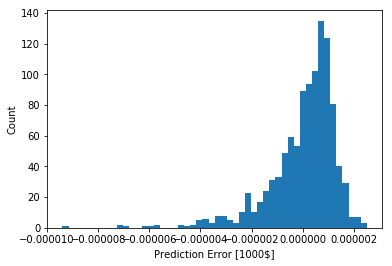

In [31]:
y_pred = model_L.predict( X_test ).flatten()

prediction = []
prediction.append(y_test)
prediction.append(y_pred)
predictions["Lasso"] = prediction 

plot_predict_error(y_test, y_pred)

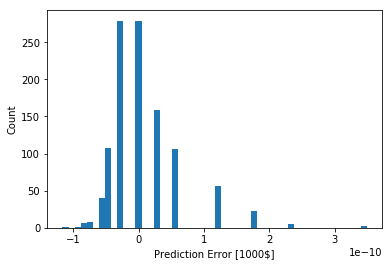

In [32]:
y_pred = model_LR.predict( X_test ).flatten()

prediction = []
prediction.append(y_test)
prediction.append(y_pred)
predictions["LinearRegression"] = prediction 

plot_predict_error(y_test, y_pred)

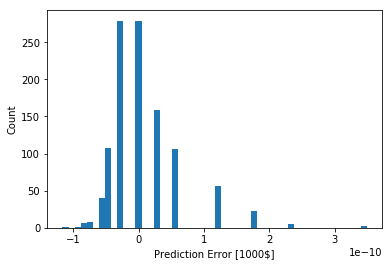

In [33]:
y_pred = model_R.predict( X_test ).flatten()

prediction = []
prediction.append(y_test)
prediction.append(y_pred)
predictions["Ridge"] = prediction 

plot_predict_error(y_test, y_pred)

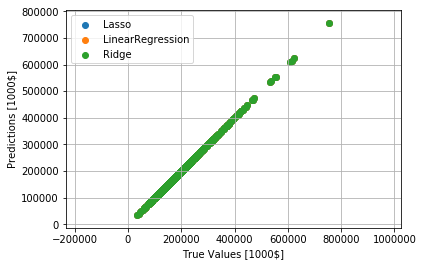

In [34]:
plot_predict(predictions)

## Use multiple regression model to predict

stacker = LinearRegression()
stacker.fit( df[ [ 'predictedSVR', 'predictedLASSO', 'predictedGBR' ] ], df['predicted'] )

stacker.predict()